## Creating a MySQL Table within Python and call it as DataFrame in Python-this is what you will do in group assignment 2 

In [8]:
import mysql.connector 

# The Database "mfe2024" already exists in MySQL. We need to create a new table called " firsttable". Make sure to have done: "pip install mysql-connector-python" once!

In [9]:
connection = mysql.connector.connect(host='localhost',database='mfe2024',user='johnw',password='AI_2022coding')

DatabaseError: 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)

In [54]:
mySql_newTable= """CREATE TABLE firsttable ( 
                             Id int(11) NOT NULL,
                             Names varchar(250) NOT NULL,
                             citi_origin varchar(250) NOT NULL,
                             Annual_salary float NOT NULL,
                             PRIMARY KEY (Id)) """


## the table is now created, we can insert rows

In [55]:
mySql_query1 = """INSERT INTO firsttable (Id, Names,citi_origin, Annual_salary) 
                           VALUES 
                           (100, 'Jean Luc Mubenga', 'Lubumbashi', 65000) """


In [56]:
cursor = connection.cursor()
cursor.execute(mySql_newTable)
connection.commit()
print(cursor.rowcount, "Record inserted successfully into firsttable")    

0 Record inserted successfully into firsttable


   ### insert multiple rows: must be less than 10 rows

In [57]:
### initialise the query contents
mySql_insert_query = """INSERT INTO firsttable (Id, Names,citi_origin, Annual_salary) 
                           VALUES (%s, %s, %s, %s) """
### identifying rows to insert
multiple_rows_to_insert = [(101, 'Ben Mudiangombe', 'kinshasa', 64000),
                         (102, 'Guy Maja', 'Durbin', 69000),
                        
                          (110,'Alfred Zuma','London',105000)]


In [58]:
### Now execute this multiple rows query
cursor = connection.cursor()
cursor.executemany(mySql_insert_query, multiple_rows_to_insert)
connection.commit()
print(cursor.rowcount, "Multiple Record inserted successfully into firsttable table")

3 Multiple Record inserted successfully into firsttable table


In [59]:

multiple_rows_to_insert2 = [(103, ' Felicia Zulu', 'Johannesburg', 80000),
                          (104,'Queen Mabe','Mpumalanga',48000),
                          (105,'Justin Tshabalala','Harare',49000),
                          (106,'Morgan Vusi','Johannesburg',93000),
                          (107,'Juri Jao','CapeTown',83000),
                          (108,'Calvin Manvagure','Paris',102000),
                          (109,'Joakin Malewa','Durbin',98000)]

In [60]:
cursor = connection.cursor()
cursor.executemany(mySql_insert_query, multiple_rows_to_insert2)
connection.commit()
print(cursor.rowcount, "Multiple Record inserted successfully into firsttable table")

7 Multiple Record inserted successfully into firsttable table


### select allrows from the table

In [61]:
sql_select_Query = "select * from firsttable"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
   

## or use fetch all 

In [62]:
# get all records
records = cursor.fetchall()
print("Total number of rows in table: ", cursor.rowcount)

print("\nPrinting each row")
for row in records:
        print("Id = ", row[0], )
        print("Names = ", row[1])
        print("citi_origin = ", row[2])
        print("Annual_salary = ", row[3], "\n")

Total number of rows in table:  10

Printing each row
Id =  101
Names =  Ben Mudiangombe
citi_origin =  kinshasa
Annual_salary =  64000.0 

Id =  102
Names =  Guy Maja
citi_origin =  Durbin
Annual_salary =  69000.0 

Id =  103
Names =   Felicia Zulu
citi_origin =  Johannesburg
Annual_salary =  80000.0 

Id =  104
Names =  Queen Mabe
citi_origin =  Mpumalanga
Annual_salary =  48000.0 

Id =  105
Names =  Justin Tshabalala
citi_origin =  Harare
Annual_salary =  49000.0 

Id =  106
Names =  Morgan Vusi
citi_origin =  Johannesburg
Annual_salary =  93000.0 

Id =  107
Names =  Juri Jao
citi_origin =  CapeTown
Annual_salary =  83000.0 

Id =  108
Names =  Calvin Manvagure
citi_origin =  Paris
Annual_salary =  102000.0 

Id =  109
Names =  Joakin Malewa
citi_origin =  Durbin
Annual_salary =  98000.0 

Id =  110
Names =  Alfred Zuma
citi_origin =  London
Annual_salary =  105000.0 



### Call the Table in Python as Dataframe for deployment

In [63]:
import pandas as pd
df_table = pd.read_sql('SELECT * FROM firsttable', con=connection)


In [64]:
df_table

,Id,Names,citi_origin,Annual_salary
0,101,Ben Mudiangombe,kinshasa,64000.0
1,102,Guy Maja,Durbin,69000.0
2,103,Felicia Zulu,Johannesburg,80000.0
3,104,Queen Mabe,Mpumalanga,48000.0
4,105,Justin Tshabalala,Harare,49000.0
5,106,Morgan Vusi,Johannesburg,93000.0
6,107,Juri Jao,CapeTown,83000.0
7,108,Calvin Manvagure,Paris,102000.0
8,109,Joakin Malewa,Durbin,98000.0
9,110,Alfred Zuma,London,105000.0


In [65]:
df_table['Annual_salary'].mean()

79100.0

In [66]:
df_table['Annual_salary'].std()

20989.150636565653

In [67]:
df_table.groupby('citi_origin').mean()

,Id,Annual_salary
citi_origin,,
CapeTown,107.0,83000.0
Durbin,105.5,83500.0
Harare,105.0,49000.0
Johannesburg,104.5,86500.0
London,110.0,105000.0
Mpumalanga,104.0,48000.0
Paris,108.0,102000.0
kinshasa,101.0,64000.0


In [68]:
df_table.groupby('Names').mean()

,Id,Annual_salary
Names,,
Felicia Zulu,103.0,80000.0
Alfred Zuma,110.0,105000.0
Ben Mudiangombe,101.0,64000.0
Calvin Manvagure,108.0,102000.0
Guy Maja,102.0,69000.0
Joakin Malewa,109.0,98000.0
Juri Jao,107.0,83000.0
Justin Tshabalala,105.0,49000.0
Morgan Vusi,106.0,93000.0


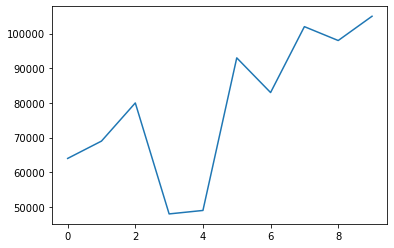

In [69]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.plot(df_table['Annual_salary'])

<AxesSubplot:xlabel='Annual_salary', ylabel='Count'>

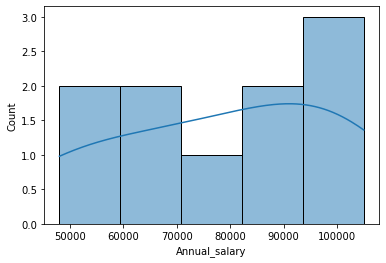

In [70]:
sn.histplot(df_table['Annual_salary'],kde=True)

<AxesSubplot:ylabel='Count'>

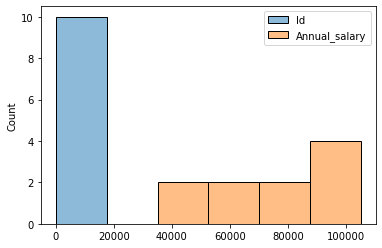

In [71]:
sn.histplot(df_table)